# Portfolio Optimization using Deep Reinforcement Learning
---

## 6 Backtesting and Evaluation of the Portfolios

### 6.1 Import Relevant Packages

In [26]:
import numpy as np 
import pandas as pd 
import pyfolio as pf
from pyfolio import timeseries
import matplotlib.pylab as plt
from backtest import BackTestStats, BaselineStats, BackTestPlot, backtest_strat, baseline_strat

In [27]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### 6.2 Load the Train and Test Data for Portfolios

In [28]:
%store -r max_sharpe_portfolio
%store -r uniform_weights_port

%store -r prices_train_df
%store -r prices_test_df


%store -r a2c_train_daily_return
%store -r ppo_train_daily_return
%store -r ddpg_train_daily_return
%store -r sac_train_daily_return
%store -r td3_train_daily_return

%store -r a2c_test_returns 
%store -r ppo_test_returns 
%store -r ddpg_test_returns 
%store -r sac_test_returns
%store -r td3_test_returns

In [29]:
returns_train = prices_train_df.pct_change() # get the assets daily returns
returns_test = prices_test_df.pct_change()

# get the culmulative returns for each portfolio
uw_weights = uniform_weights_port.values.flatten()
uw_returns = returns_train.dot(uw_weights)
uw_cum_returns = (1 + uw_returns).cumprod()
uw_cum_returns.name = "portfolio 1: uniform weights"

max_sharpe_weights = max_sharpe_portfolio.values.flatten()
max_sharpe_returns = returns_train.dot(max_sharpe_weights)
max_sharpe_cum_returns = (1 + max_sharpe_returns).cumprod()
max_sharpe_cum_returns.name = "portfolio 2: max sharpe"

a2c_train_cum_returns = (1 + a2c_train_daily_return.reset_index(drop=True).set_index(['date'])).cumprod()
a2c_train_cum_returns = a2c_train_cum_returns['daily_return']
a2c_train_cum_returns.name = 'Portfolio 3: a2c Model'

ppo_train_cum_returns = (1 + ppo_train_daily_return.reset_index(drop=True).set_index(['date'])).cumprod()
ppo_train_cum_returns = ppo_train_cum_returns['daily_return']
ppo_train_cum_returns.name = 'Portfolio 4: ppo Model'

ddpg_train_cum_returns = (1 + ddpg_train_daily_return.reset_index(drop=True).set_index(['date'])).cumprod()
ddpg_train_cum_returns = ddpg_train_cum_returns['daily_return']
ddpg_train_cum_returns.name = 'Portfolio 5: ddpg Model'

sac_train_cum_returns = (1 + sac_train_daily_return.reset_index(drop=True).set_index(['date'])).cumprod()
sac_train_cum_returns = sac_train_cum_returns['daily_return']
sac_train_cum_returns.name = 'Portfolio 6: sac Model'

td3_train_cum_returns = (1 + td3_train_daily_return.reset_index(drop=True).set_index(['date'])).cumprod()
td3_train_cum_returns = td3_train_cum_returns['daily_return']
td3_train_cum_returns.name = 'Portfolio 7: td3 Model'


date_list = list(td3_train_cum_returns.index)

max_sharpe_cum_returns = max_sharpe_cum_returns[(max_sharpe_cum_returns.index).isin (date_list)]
uw_cum_returns = uw_cum_returns[(uw_cum_returns.index).isin (date_list)]


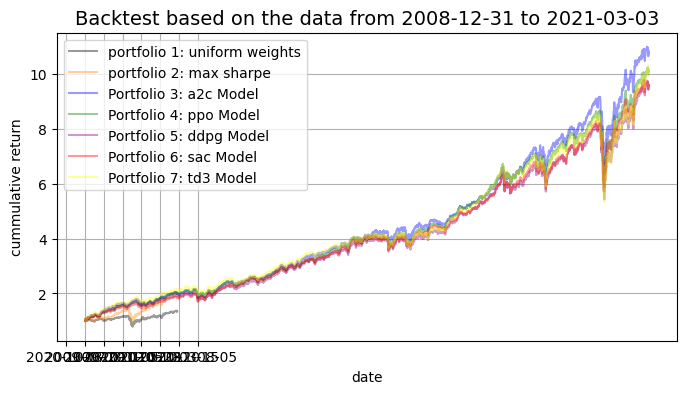

In [30]:
# Plot the culmulative returns of the portfolios
fig, ax = plt.subplots(figsize=(8,4))
uw_cum_returns.plot(ax=ax, color="black", alpha=0.4);
max_sharpe_cum_returns.plot(ax=ax, color="darkorange", alpha=0.4);

a2c_train_cum_returns.plot(ax=ax, color='blue', alpha=0.4)
ppo_train_cum_returns.plot(ax=ax, color='green', alpha=0.4)
ddpg_train_cum_returns.plot(ax=ax, color='purple', alpha=0.4)
sac_train_cum_returns.plot(ax=ax, color='red', alpha=0.4)
td3_train_cum_returns.plot(ax=ax, color='yellow', alpha=0.4)

plt.legend(loc="best");
plt.grid(True);
ax.set_ylabel("cummulative return");
ax.set_title("Backtest based on the data from 2008-12-31 to 2021-03-03", fontsize=14);
fig.savefig('results/back_test_on_train_data.png');

### 6.4 Evaluating the Portfolios on Test Data

In [31]:
# get the culmulative returns for each portfolio
uw_weights = uniform_weights_port.values.flatten()
uw_test_returns = returns_test.dot(uw_weights)
uw_test_cum_returns = (1 + uw_test_returns).cumprod()
uw_test_cum_returns.name = "portfolio 1: uniform weights"

max_sharpe_weights = max_sharpe_portfolio.values.flatten()
max_sharpe_test_returns = returns_test.dot(max_sharpe_weights)
max_sharpe_test_cum_returns = (1 + max_sharpe_test_returns).cumprod()
max_sharpe_test_cum_returns.name = "portfolio 2: max sharpe"

a2c_test_cum_returns = (1 + a2c_test_returns['daily_return']).cumprod()
a2c_test_cum_returns.name = 'Portfolio 3: a2c Model'

ppo_test_cum_returns = (1 + ppo_test_returns['daily_return']).cumprod()
ppo_test_cum_returns.name = 'Portfolio 4: ppo Model'

ddpg_test_cum_returns = (1 + ddpg_test_returns['daily_return']).cumprod()
ddpg_test_cum_returns.name = 'Portfolio 5: ddpg Model'

sac_test_cum_returns = (1 + sac_test_returns['daily_return']).cumprod()
sac_test_cum_returns.name = 'Portfolio 6: sac Model'

td3_test_cum_returns = (1 + td3_test_returns['daily_return']).cumprod()
td3_test_cum_returns.name = 'Portfolio 7: td3 Model'

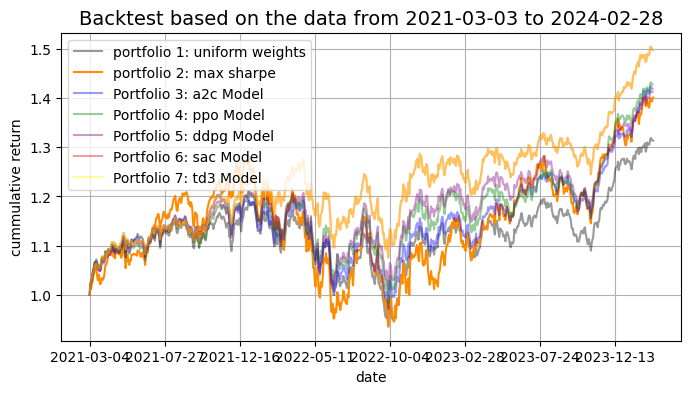

In [32]:
# Plot the culmulative returns of the portfolios
fig, ax = plt.subplots(figsize=(8,4))
uw_test_cum_returns.plot(ax=ax, color="black", alpha=.4);
max_sharpe_test_cum_returns.plot(ax=ax, color="darkorange");
a2c_test_cum_returns.plot(ax=ax, color='blue', alpha=.4)
ppo_test_cum_returns.plot(ax=ax, color='green', alpha=.4)
ddpg_test_cum_returns.plot(ax=ax, color='purple', alpha=.4)
sac_test_cum_returns.plot(ax=ax, color='red', alpha=.4)
td3_test_cum_returns.plot(ax=ax, color='yellow', alpha=.4)
plt.legend(loc="best");
plt.grid(True);
ax.set_ylabel("cummulative return");
ax.set_title("Backtest based on the data from 2021-03-03 to 2024-02-28", fontsize=14);
fig.savefig('results/back_test_on_test_data.png');

### 6.5 Get the Portfolio Statistics

In [33]:
# Define a Function for Getting the Portfolio Statistics

def portfolio_stats(portfolio_returns):
    # Pass the returns into a dataframe
    port_rets_df = pd.DataFrame(portfolio_returns)
    port_rets_df = port_rets_df.reset_index()
    port_rets_df.columns = ['date','daily_return']
    
    #Use the FinRL Library to get the Portfolio Returns
    #This makes use of the Pyfolio Library
    
    DRL_strat = backtest_strat(port_rets_df)
    perf_func = timeseries.perf_stats 
    perf_stats_all = perf_func( returns=DRL_strat, 
                                  factor_returns=DRL_strat, 
                                    positions=None, transactions=None, turnover_denom="AGB")
    perf_stats_all = pd.DataFrame( perf_stats_all)
    perf_stats_all.columns = ['Statistic']
    return perf_stats_all

In [34]:
uw_test_returns.shape

(752,)

In [35]:
# Get the Portfolio Statistics for all the portfolios
portfolios_returns_dict = {'uniform_weights':uw_test_returns, 'maximum_sharpe':max_sharpe_test_returns,
                          'a2c Model': a2c_test_returns['daily_return'],
                          'ppo Model': ppo_test_returns['daily_return'],
                          'ddpg Model': ddpg_test_returns['daily_return'],
                          'sac Model': sac_test_returns['daily_return'],
                          'td3 Model': td3_test_returns['daily_return']}

portfolios_stats = pd.DataFrame()
for i,j in portfolios_returns_dict.items():
    port_stats = portfolio_stats(j)
    portfolios_stats[i] = port_stats['Statistic']

In [36]:
portfolios_stats

,uniform_weights,maximum_sharpe,a2c Model,ppo Model,ddpg Model,sac Model,td3 Model
Annual return,0.095705,0.119711,0.124482,0.126899,0.122748,0.145208,0.145208
Cumulative returns,0.313564,0.401323,0.418558,0.427663,0.412047,0.497907,0.497907
Annual volatility,0.148799,0.194083,0.145744,0.147457,0.140562,0.135800,0.135800
Sharpe ratio,0.689506,0.680420,0.877975,0.884092,0.894114,1.066541,1.066541
Calmar ratio,0.444592,0.442054,0.645080,0.673570,0.736322,0.925663,0.925663
Stability,0.174943,0.183720,0.361174,0.492152,0.563315,0.761968,0.761968
Max drawdown,-0.215265,-0.270806,-0.192972,-0.188398,-0.166704,-0.156869,-0.156869
Omega ratio,1.124038,1.122133,1.160540,1.161136,1.163632,1.197282,1.197282
Sortino ratio,0.995849,0.983762,1.279008,1.278067,1.296441,1.554484,1.554484
Skew,NaN,NaN,-0.094876,-0.210259,-0.181979,-0.175996,-0.175996


### 6.6 Benchmarking the Best Portfolio against the Benchmark Index

In [37]:
#a2c_test_returns = a2c_test_returns.set_index('date')
ppo_test_returns = ppo_test_returns.set_index('date')
ddpg_test_returns = ddpg_test_returns.set_index('date')
sac_test_returns = sac_test_returns.set_index('date')
td3_test_returns = td3_test_returns.set_index('date')

In [38]:
a2c_test_returns.head()

,date,daily_return
0,2021-03-04,0.000000
1,2021-03-05,0.021546
2,2021-03-08,0.004175
3,2021-03-09,0.000884
4,2021-03-10,0.011358


In [40]:
# Getting the best performing portfolio

ps_cum = [a2c_test_cum_returns, ppo_test_cum_returns,ddpg_test_cum_returns, sac_test_cum_returns, td3_test_cum_returns]
ps = [a2c_test_returns['daily_return'], ppo_test_returns['daily_return'], ddpg_test_returns['daily_return'], sac_test_returns['daily_return'], td3_test_returns['daily_return']]

final_return = []
for p in ps_cum:
    final_return.append(p.iloc[-1])
    
id_ = np.argmax(final_return)
best_p = ps[id_]
best_p.name = (ps_cum[id_]).name 

print("Best portfolio: ",  best_p.name)
print("Final cumulative return: {:.2f} ".format(final_return[id_]))

Best portfolio:  Portfolio 6: sac Model
Final cumulative return: 1.50 


In [41]:
# convert the best portfolio into a Dataframe

best_p = pd.DataFrame(best_p)
best_p = best_p.reset_index()
best_p.columns=['date','daily_return']
best_p['date'] = a2c_test_returns['date']

In [42]:
best_p.head()

,date,daily_return
0,2021-03-04,0.000000
1,2021-03-05,0.020611
2,2021-03-08,0.006154
3,2021-03-09,0.003974
4,2021-03-10,0.010967


In [43]:
# Best portfolio stats
best_port_strat = backtest_strat(best_p)
perf_func = timeseries.perf_stats 
perf_stats_all = perf_func( returns=best_port_strat, 
                              factor_returns=best_port_strat, 
                                positions=None, transactions=None, turnover_denom="AGB")

In [44]:
prices_test_dates = list(prices_test_df.index)

print("==============Get Index Stats===========")
baesline_perf_stats=BaselineStats('^DJI',
                                  baseline_start = prices_test_dates[0],
                                  baseline_end = prices_test_dates[-1])

[*********************100%%**********************]  1 of 1 completed

==============Get Index Stats===========
Shape of DataFrame:  (751, 8)
Annual return          0.080711
Cumulative returns     0.260258
Annual volatility      0.148110
Sharpe ratio           0.598869
Calmar ratio           0.367857
Stability              0.021884
Max drawdown          -0.219408
Omega ratio            1.107037
Sortino ratio          0.855650
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.012944
Daily value at risk   -0.018308
Alpha                  0.000000
Beta                   1.000000
dtype: float64


In [45]:
dji, dow_strat = baseline_strat('^DJI',prices_test_dates[1], prices_test_dates[-1])

[*********************100%%**********************]  1 of 1 completed

Shape of DataFrame:  (750, 8)


In [46]:
import pyfolio
print(pyfolio.__version__)

0.9.5


In [47]:
pip install --upgrade pyfolio-reloaded


Note: you may need to restart the kernel to use updated packages.


Start date,2021-03-05
End date,2024-02-27
Total months,35
,Backtest
Annual return,14.542%
Cumulative returns,49.791%
Annual volatility,13.589%
Sharpe ratio,1.07
Calmar ratio,0.93
Stability,0.76
Max drawdown,-15.687%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,15.69,2022-04-20,2022-09-30,2022-11-25,158
1,6.53,2022-11-30,2023-03-13,2023-04-13,97
2,6.36,2023-07-31,2023-10-27,2023-11-15,78
3,5.77,2022-01-04,2022-02-24,2022-03-18,54
4,4.84,2021-11-03,2021-12-01,2021-12-15,31


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pyfolio/plotting.py:1373: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.boxplot(


UnboundLocalError: local variable 'boxprops' referenced before assignment

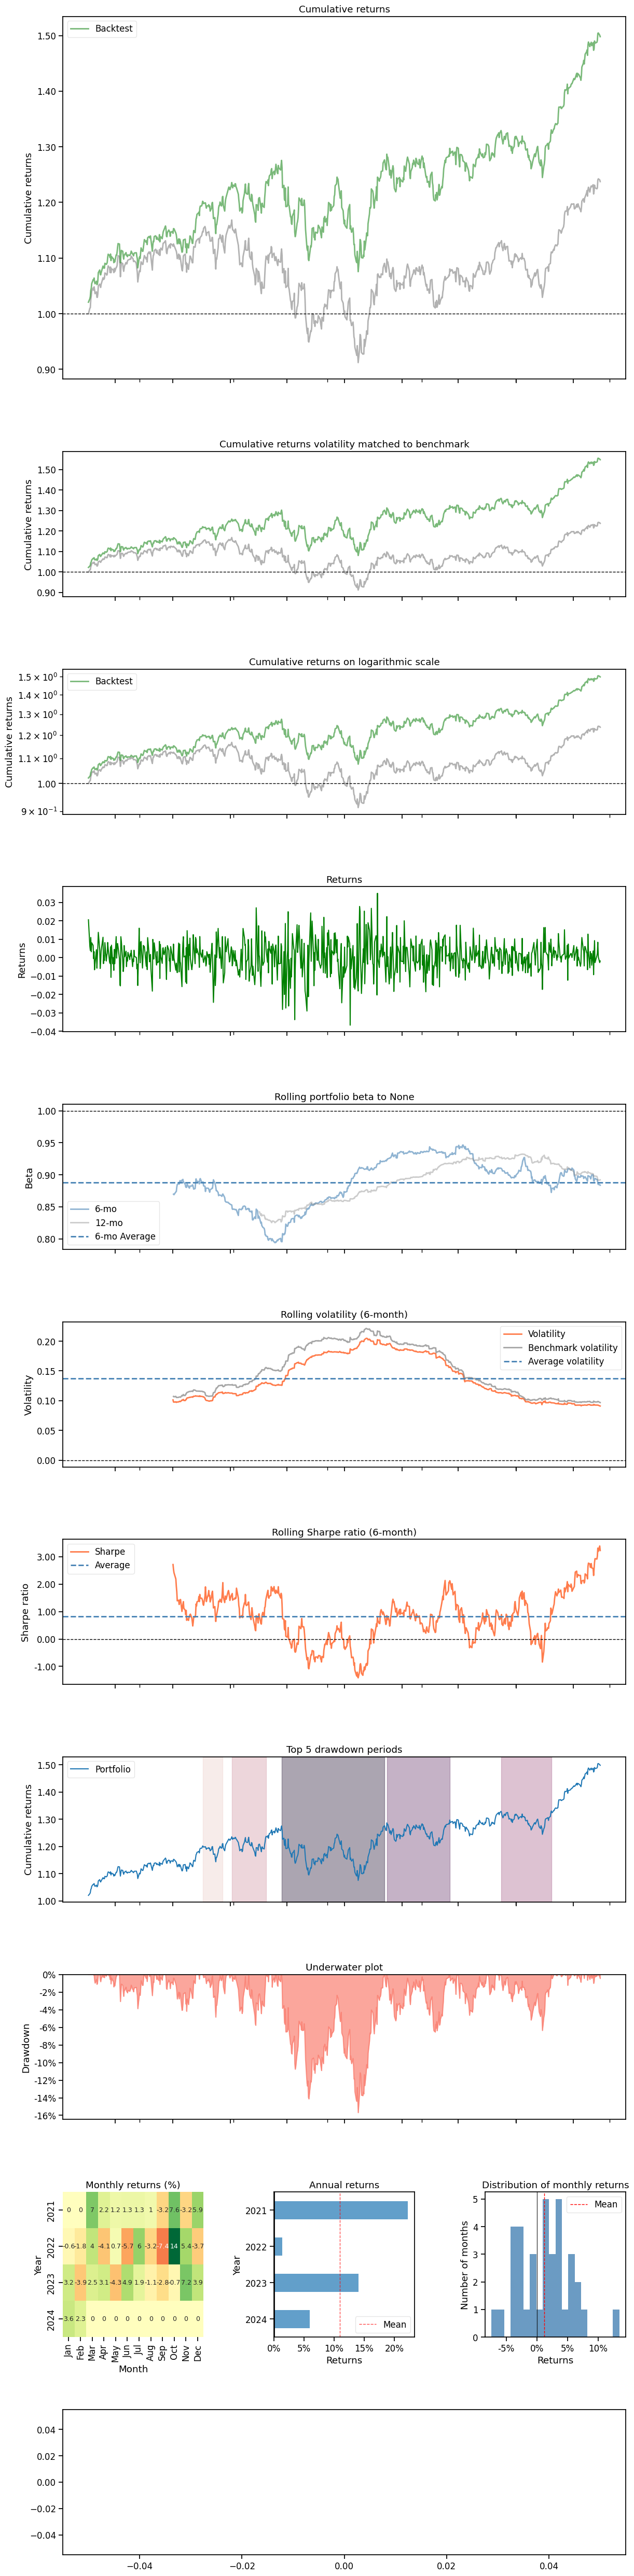

In [48]:
# Get the Benchmarking Plots
import pyfolio
%matplotlib inline
with pyfolio.plotting.plotting_context(font_scale=1.1):
        pyfolio.create_full_tear_sheet(returns = best_port_strat,
                                       benchmark_rets=dow_strat, set_context=False)